**Description :**  
In this project, we've used the LSTM model to predict the closing stock price of a corporation (Apple) using the past 30 day stock price.

In [40]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Import the dataset
df=pd.read_csv('/content/drive/MyDrive/Apple_2013_2016.csv',index_col='Date')
df2=df.copy()
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,16.960691
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.746618


In [43]:
df.shape

(1008, 6)

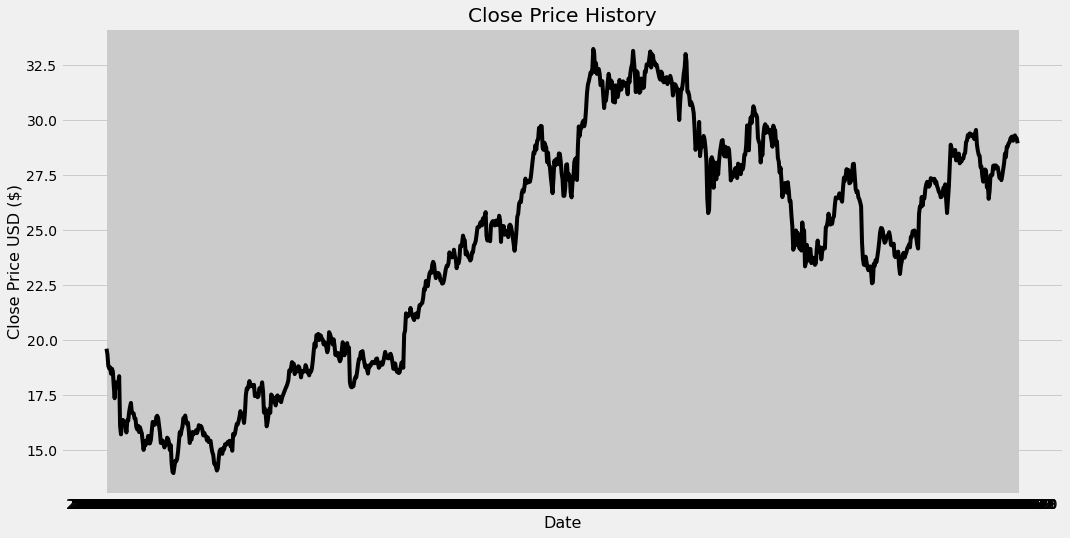

In [44]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='black')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.show()

In [45]:
# Create a new dataframe containing the Close column and convert it to a numpy array
data=df[['Close']].values
data[:10]
# Get the number of rows in the train set
training_data_len=int(len(data)*.75)
training_data_len

756

In [46]:
# Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)
scaled_data

array([[0.29326322],
       [0.28044107],
       [0.25250243],
       ...,
       [0.78966458],
       [0.78927604],
       [0.77748996]])

In [47]:
#Create the scaled training dataset
train_data=scaled_data[0:training_data_len, :]
# split into train and test
x_train=[]
y_train=[]
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31 :
        print(x_train)
        print(y_train)
        print()

[array([0.29326322, 0.28044107, 0.25250243, 0.2467667 , 0.24937547,
       0.23418506, 0.24604516, 0.24010587, 0.20578387, 0.17649455,
       0.21381386, 0.20750451, 0.20254595, 0.21137158, 0.22846781,
       0.11095903, 0.09130941, 0.10971931, 0.12533531, 0.122671  ,
       0.12019167, 0.11673171, 0.095824  , 0.12453976, 0.12363315,
       0.14374526, 0.15625289, 0.16541152, 0.14315317, 0.14150645])]
[0.1407293764499038]

[array([0.29326322, 0.28044107, 0.25250243, 0.2467667 , 0.24937547,
       0.23418506, 0.24604516, 0.24010587, 0.20578387, 0.17649455,
       0.21381386, 0.20750451, 0.20254595, 0.21137158, 0.22846781,
       0.11095903, 0.09130941, 0.10971931, 0.12533531, 0.122671  ,
       0.12019167, 0.11673171, 0.095824  , 0.12453976, 0.12363315,
       0.14374526, 0.15625289, 0.16541152, 0.14315317, 0.14150645]), array([0.28044107, 0.25250243, 0.2467667 , 0.24937547, 0.23418506,
       0.24604516, 0.24010587, 0.20578387, 0.17649455, 0.21381386,
       0.20750451, 0.20254595, 0.2

In [48]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
x_train.shape

(726, 30)

In [50]:
# Reshape the data(LSTM model expect three dimentions)
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1] , 1))
x_train.shape

(726, 30, 1)

In [51]:
# Build the LSTM model 
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(30, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [52]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
# Train the model
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
726/726 [==============================] - 20s 21ms/step - loss: 0.0062
Epoch 2/50
726/726 [==============================] - 16s 21ms/step - loss: 0.0033
Epoch 3/50
726/726 [==============================] - 16s 21ms/step - loss: 0.0022
Epoch 4/50
726/726 [==============================] - 16s 22ms/step - loss: 0.0018
Epoch 5/50
726/726 [==============================] - 16s 22ms/step - loss: 0.0014
Epoch 6/50
726/726 [==============================] - 16s 21ms/step - loss: 0.0011
Epoch 7/50
726/726 [==============================] - 16s 22ms/step - loss: 9.9994e-04
Epoch 8/50
726/726 [==============================] - 16s 21ms/step - loss: 9.8180e-04
Epoch 9/50
726/726 [==============================] - 16s 22ms/step - loss: 8.1797e-04
Epoch 10/50
726/726 [==============================] - 16s 21ms/step - loss: 7.8043e-04
Epoch 11/50
726/726 [==============================] - 16s 22ms/step - loss: 0.0013
Epoch 12/50
726/726 [==============================] - 15s 21ms/step 

In [60]:
# create x_test and y_test
test_data=scaled_data[training_data_len-30:, :]
x_test=[]
y_test=data[training_data_len:,:]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0])

In [61]:
# Convert the data to numpy array
x_test=np.array(x_test)
# Reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [62]:
x_test.shape

(252, 30, 1)

In [63]:
# get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [64]:
# Get the root mean quared error (RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.27965750013078944

In [69]:
data

array([[19.60821342],
       [19.36071396],
       [18.8214283 ],
       ...,
       [29.19000053],
       [29.18250084],
       [28.95499992]])

<function matplotlib.pyplot.show>

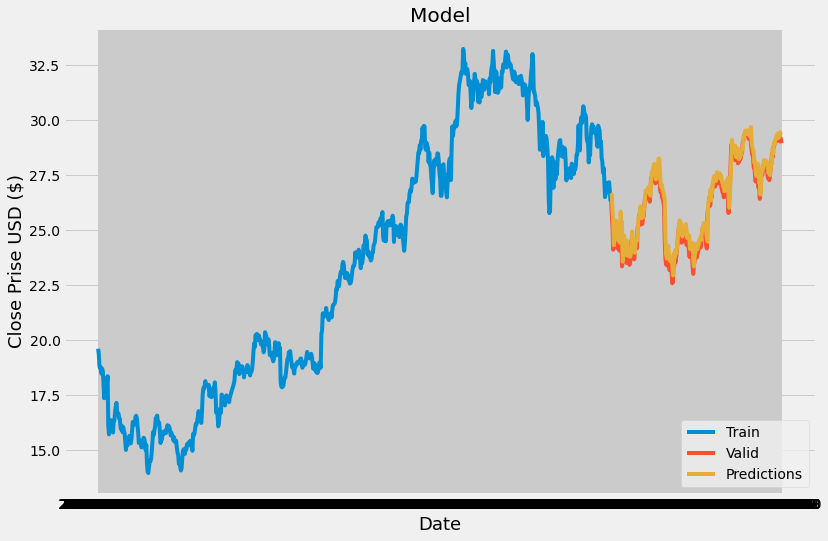

In [71]:
# Plot the data 
train=df[['Close']][:training_data_len]
valid=df[['Close']][training_data_len:]
valid['predictions']=predictions
# visualize the data
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prise USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show

In [72]:
# Show the valid and predicted prices
valid

,Close,predictions
Date,,
2016-01-04,26.337500,26.575598
2016-01-05,25.677500,26.623142
2016-01-06,25.174999,25.911150
2016-01-07,24.112499,25.446527
2016-01-08,24.240000,24.319427
...,...,...
2016-12-23,29.129999,29.207943
2016-12-27,29.315001,29.288988
2016-12-28,29.190001,29.463579
